<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Introduction</b></font>

In today's world of entertainment, movies have a big impact on how we see the world and feel. But with so many movies out there in different types, on different platforms, and in different languages, it's hard to pick a movie that we'll actually like. This can make choosing a movie frustrating and take up a lot of time.

Having lots of movies on streaming platforms is also a problem for both viewers and the platforms themselves. People find it tough to find a movie they'll enjoy in the sea of options. And the platforms miss out on making money if people don't stick around to watch more. If the recommendations aren't good, people might stop using the platform. So, it's really important for platforms to have smart movie recommendation systems. These systems help with technology and also with making money.

A Machine Learning Recommender System is a special tool that uses data to give personalized movie suggestions. This makes users happy and keeps them coming back. It also helps platforms by suggesting movies that people are more likely to watch. This way, they can show ads or promote movies more effectively. For businesses, the primary objective is to increase user engagement and maximize revenue through targeted promotions and advertisements.

For users, it's like having a friend who knows what kind of movies you like, saving you from wasting time trying out movies you won't enjoy. This is super important in the digital age when there are so many movies to choose from. The objective here is to enhance the user's experience by providing personalized, relevant, and high-quality movie recommendations that align with their preferences and watching history.

This system looks at different things to figure out what movies to suggest. It looks at your profile, like your age, gender, and what you've watched before. It also looks at the details of the movies, like the type, director, actors, reviews, and ratings. The system even checks how you behave on the platform, like what you click on and how long you watch. It also considers things like which movies are popular right now or have won awards.

What you get from this system are recommendations that match what you like and do. It also guesses how much you might like a movie. It explains why it's suggesting a movie, and if you don't like the first idea, it gives you other suggestions to try.

A Machine Learning Recommender System is like a helpful tool for both people and platforms in the world of picking movies today. By using fancy computer methods and lots of data, this system aims to elevate user satisfaction and drive business success by fine-tuning the movie discovery process.

In this article, we will delve deeper into the intricacies of a Machine Learning Recommender System designed to address the challenges outlined above. We will explore various algorithms and techniques that power these systems, such as collaborative filtering, content-based filtering, and hybrid models that blend the strengths of both approaches. Moreover, we will examine how the system incorporates additional layers of personalization through features like weighted scores, genre-specific recommendations, and real-time adaptability based on user behavior.

We will also discuss the practical implications of implementing this system. For instance, how it serves as a solution for businesses to retain customers and for users to streamline their movie selection process. Additionally, we will touch upon how the system can cater to various scenarios like group recommendations and cold starts for new users. Special attention will be paid to evaluating the performance of the system, as we look at metrics such as RMSE (Root Mean Square Error) and MAE (Mean Absolute Error) to understand the system's accuracy and reliability.

By the end of this article, the aim is to provide a comprehensive understanding of how a Machine Learning Recommender System can revolutionize the way we discover and enjoy movies. It not only makes the movie-watching experience more enjoyable for users but also serves as a powerful tool for businesses in the entertainment industry to optimize user engagement and revenue generation. So, let's embark on this journey to unravel the magic behind smart movie recommendations.

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Dataset and Features Description</b></font>

---

### Ratings Dataset (`ratings_small.csv`)

This dataset serves as the **backbone for building robust movie recommender systems**, capturing user ratings for different movies.

- **Columns**:
  - **`userId`**: Unique identifier for each user, crucial for tracking individual rating behaviors.
  - **`movieId`**: Unique identifier for each movie, linking the ratings to specific movies.
  - **`rating`**: The rating score given by the user to a movie, usually on a scale like 0.5-5 or 1-10.
  - **`timestamp`**: Records the time when the rating was given, valuable for generating time-sensitive recommendations.

---

### Movies Dataset (`movies.csv`)

A **comprehensive collection of movie metadata** that includes a variety of features ranging from the film's title and tagline to its runtime and revenue.

- **Columns**:
  - **`id`**: Unique identifier for each movie.
  - **`genres`**: Categorizes each movie into one or multiple genres.
  - **`title`**: The official title of the movie.
  - **`overview`**: A brief description or synopsis of the movie.
  - **`revenue`**: Financial earnings from box office and other sources.
  - **`vote_average`**: The average rating given by viewers.
  - **`vote_count`**: The total number of ratings the movie has received.
  - **other**

---

### Keywords Dataset (`keywords.csv`)

This dataset **enriches the movies with a list of key phrases and words** that contains a list of words or phrases that summarize the themes or unique features of each movies. These keywords can serve quick references to understand the main topic of the movies, plot elements, or unique feature of each movies.

- **Columns**:
  - **`id`**: Unique identifier that links back to the movies dataset.
  - **`keywords`**: A collection of words or phrases summarizing the movie's essence, used for content-based filtering and search features.
  
---

### Credits Dataset (`credits.csv`)

Holds **detailed information about the cast and crew** involved in each movie, providing an in-depth look at the people behind the production.

- **Columns**:
  - **`id`**: Unique identifier that can be used to merge with the movies dataset.
  - **`cast`**: Lists the actors and their roles, valuable for actor-based recommendations.
  - **`crew`**: Specifies the personnel involved in various aspects of production, such as directing and writing, useful for director- or writer-based recommendations.

---


<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Data Preprocessing</b></font>

In [19]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Utilities
from ast import literal_eval
from collections import Counter
import datetime

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Surprise Library
from surprise import (Reader, Dataset, SVD, SVDpp, KNNBasic, NMF, CoClustering, SlopeOne,
                      NormalPredictor, KNNBaseline, KNNWithMeans, KNNWithZScore, BaselineOnly,
                      accuracy, accuracy)
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV


In [20]:
#Read Data Set
movies_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/movies_metadata.csv")
keywords_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/keywords.csv")
credits_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/credits.csv")
ratings_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/ratings_small.csv")

C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_5076\317922346.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("C:/Users/bmurdyantoro/OneDrive - Zuellig Pharma Holdings Pte Ltd/Documents/Pacman Cource/Recomender System/The Movies Dataset 2/movies_metadata.csv")


#### 3.1 Merge DataFrames for Comprehensive Data

In this step, our aim is to create a unified DataFrame that encapsulates all the relevant information we have. To achieve this, we'll perform the following actions:

1. **Base DataFrame**: Start with `movies_df`, which contains core details about each movie.
2. **Additional Data**: Use `keywords_df` and `credits_df` to supplement this information.
3. **Merging Criteria**: Link these DataFrames using the unique movie IDs as the common key.

By merging these DataFrames, we'll establish a more holistic dataset, facilitating a richer analysis and more accurate modeling in subsequent steps.


In [21]:
movies_df = movies_df[~(movies_df['id'].str.contains('-'))]
movies_df['id'] = movies_df['id'].astype('int64')
movies_df = pd.merge(movies_df, keywords_df, on='id', how='left')
movies_df = pd.merge(movies_df, credits_df, on='id', how='left')

In [22]:
del keywords_df
del credits_df

#### 3.2 Handle Missing Values

After merging the data, the next crucial step is to deal with missing values. Handling these correctly ensures that our analysis and models are accurate and reliable.


In [23]:
# Checking for Missing Values
movies_df.isnull().sum()

adult                        0
belongs_to_collection    42055
budget                       0
genres                       0
homepage                 38620
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   995
popularity                   4
poster_path                399
production_companies         4
production_countries         4
release_date                88
revenue                      4
runtime                    268
spoken_languages             4
status                      86
tagline                  25846
title                        4
video                        4
vote_average                 4
vote_count                   4
keywords                     1
cast                         1
crew                         1
dtype: int64

To ensure the quality of our recommendation model, it's essential to handle missing values effectively. Here's our strategy:

1. **Drop Unnecessary Columns**: Certain columns, like `'belongs_to_collection'`, `'homepage'`, `'imdb_id'`, `'poster_path'`, `'status'`, and `'video'`, don't provide useful information for our model. We remove them.
    
2. **Handle Text-Based Columns**: Some columns contain text data, such as `'tagline'`, `'original_language'`, and `'keywords'`. Missing values in these columns are replaced with an empty string.
3. **Handle Numerical Columns**: For numerical columns like `'runtime'`, we replace missing values with 0 to avoid skewing our analysis.

By following these steps, we clean our dataset and make it ready for building a robust recommendation model.


In [24]:
# Drop the specified columns
column_to_drop = ['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 'video']
movies_df = movies_df.drop(column_to_drop, axis=1)

# Replace missing values in text columns with 'Unknown'
text_columns = ['original_language','tagline']
movies_df[text_columns] = movies_df[text_columns].fillna('')

# Replace missing value in number column with 0
number_columns = ['runtime']
movies_df[number_columns] = movies_df[number_columns].fillna(0)

# Drop the missing value rows
movies_df.dropna(inplace=True)
movies_df.head()


,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


#### 3.3 Data Transformation
We undertook several data formatting steps to prepare our dataset for analysis. This included converting the `'release_date'` column into a datetime format and extracting the year into a new `'year'` column. The `'year'` column was then standardized as an integer. Additionally, we ensured the `'popularity'` column was in a float format for numerical operations, and the `'timestamp'` column in `ratings_df` was transformed from a Unix timestamp to a standard datetime format.

In [25]:
# Convert the 'release_date' column to datetime format and extract the year into a new 'year' column
# If the conversion fails, errors are coerced to NaT (Not a Timestamp)
movies_df['year'] = pd.to_datetime(movies_df['release_date'], errors='coerce').dt.year

# Convert the 'year' column to integer type, this will convert NaT to its integer representation
movies_df['year'] = movies_df['year'].astype(int)

# Convert the 'release_date' column to datetime format again to standardize its format
# If the conversion fails, errors are coerced to NaT
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format="%Y-%m-%d", errors='coerce')

# Convert the 'popularity' column to float64 type to ensure numerical operations can be performed
movies_df['popularity'] = movies_df['popularity'].astype('float64')

# Convert the 'timestamp' column in ratings_df to datetime format using Unix timestamp
# The lambda function converts each timestamp to a datetime object
ratings_df['timestamp'] = ratings_df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))


In the data preparation phase, transforming certain columns is often necessary for easier analysis and feature engineering. Columns such as `'genres'`, `'keywords'`, `'cast'`, and `'crew'` contain complex or text-based data that may not be immediately useful in their current form.

1. **List Transformation**: These columns are transformed into lists of elements using Python's `literal_eval` function. This allows us to extract essential information from these text-based fields.
  
2. **Director Extraction**: From the `'crew'` column, we specifically extract the director's name for each movie as it can be a significant feature for recommendations.
  
3. **Top Elements**: For columns like `'genres'` and `'keywords'`, we limit the data to the top 3 elements if more than 3 elements are present. This helps in reducing dimensionality.
  
4. **Data Cleaning**: We also clean the text data by converting everything to lower case and removing spaces. This ensures uniformity in text-based features.
  
5. **Bag of Words**: Finally, a 'bag_of_words' column is created by concatenating relevant features. This will serve as a composite feature for our recommendation engine.

These transformations make the dataset more manageable and ready for model development and suitable formats for easier analysis and feature engineering.

In [26]:
# Function to extract values from a column in a DataFrame and extend a target list with these values
def extend_list_from_column(df, column_name, target_list, key='name'):
    # Replace NaN with empty lists and apply literal_eval
    # Then extract values using key and extend the target list
    temp_df = df[column_name].fillna('[]').apply(literal_eval).apply(lambda x: [i[key] for i in x] if isinstance(x, list) else [])
    for i in temp_df:
        if i:
            target_list.extend(i)

# Function to get the director's name from the 'crew' column
def get_director(x):
    return next((i['name'] for i in x if i['job'] == 'Director'), np.nan)

# Function to get the list of top 3 elements or the entire list, whichever is more
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names[:3] if len(names) > 3 else names
    return []

# Function to clean data: Convert strings to lower case and remove spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

# Function to create a bag of words from various columns
def create_bag_of_words(x):
    return ' '.join(x['keywords'] + x['cast'] + [x['director']] + x['genres'])

# Initialize empty lists for storing specific types of data
spoken_languages_list = []
cast_list = []
crew_list = []
company_list = []
country_list = []
original_language_list = []

# Extend the original_language_list from the 'original_language' column
for i in movies_df['original_language']:
    original_language_list.extend(i.split(', '))

# Use the extend_list_from_column function to populate the initialized lists
extend_list_from_column(movies_df, 'spoken_languages', spoken_languages_list)
extend_list_from_column(movies_df, 'cast', cast_list, key='character')
extend_list_from_column(movies_df, 'crew', crew_list)
extend_list_from_column(movies_df, 'production_companies', company_list)
extend_list_from_column(movies_df, 'production_countries', country_list)

# Fill NaN values and apply literal_eval to specific columns
for col in ['crew', 'cast', 'genres', 'keywords', 'production_companies']:
    movies_df[col] = movies_df[col].fillna('[]').apply(literal_eval)

# Apply the get_director function to extract directors from the 'crew' column
movies_df['director'] = movies_df['crew'].apply(get_director)

# Apply the get_list function to truncate or keep entire lists in specific columns
for col in ['cast', 'genres', 'keywords', 'production_companies']:
    movies_df[col] = movies_df[col].apply(get_list)
    
# Apply the clean_data function to sanitize feature columns
features = ['adult', 'cast', 'keywords', 'director', 'genres', 'production_companies']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)
    
# Create a 'bag_of_words' column by concatenating relevant columns
movies_df['bag_of_words'] = movies_df.apply(create_bag_of_words, axis=1)


Before proceeding with the recommendation tasks, it's crucial to ensure that the movie IDs in both the `movies_df` and `ratings_df` are the same. This will help in avoiding any mismatches or errors during the recommendation process.

The following code snippet accomplishes this by:

1. Extracting the unique movie IDs from both `movies_df` and `ratings_df`.
2. Finding the intersection of these sets to get IDs present in both dataframes.
3. Filtering `movies_df` and `ratings_df` to only include these common IDs.


In [27]:
# # First, get the unique movie IDs from both dataframes
# unique_movie_ids_movies_df = set(movies_df['id'])
# unique_movie_ids_ratings_df = set(ratings_df['movieId'])

# # Now find the intersection of these sets to get the IDs present in both dataframes
# common_movie_ids = unique_movie_ids_movies_df.intersection(unique_movie_ids_ratings_df)

# # Filter movies_df and ratings_df to only include these common IDs
# movies_df = movies_df[movies_df['id'].isin(common_movie_ids)]
# ratings_df = ratings_df[ratings_df['movieId'].isin(common_movie_ids)]

<a id="4"></a>
<font color="darkslateblue" size=+2.5><b>4. Exploratory Data Analysis (EDA)</b></font>

#### 4.1 Distribution of Movie Release Year
To get a better understanding of the distribution of movies over the years, we plot a histogram based on the `'release_date'` column. This plot provides insights into the concentration of movie releases over the years and can be useful for further analyses.

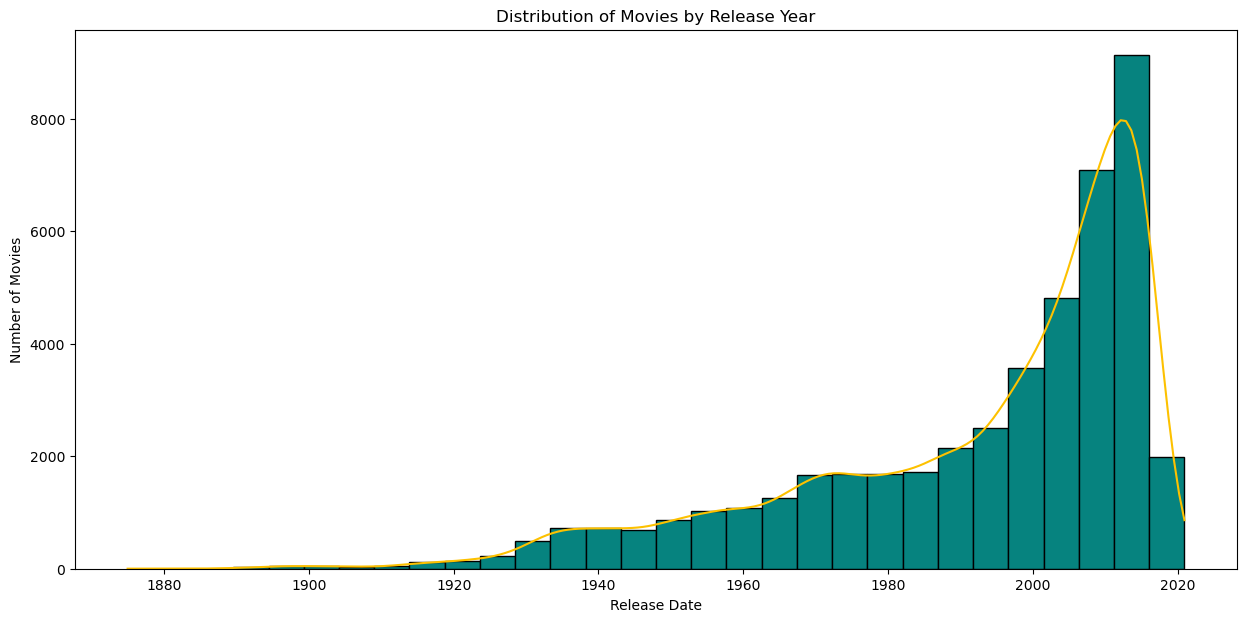

In [28]:
# 1. Plotting the histogram for movie release years
plt.figure(figsize=(15, 7))
sns.histplot(data=movies_df, x='release_date', bins=30, color='#fdc100', facecolor='#06837f', kde=True)
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.show()


Insight :
1. Growth over time : From just one movie in 1874 to nearly 2,000 in peak years, the film industry has seen exponential growth, highlighting its enduring appeal.
2. Anomaly in 2020 : The sharp decline in movie releases in 2020 likely reflects the global impact of the COVID-19 pandemic on the industry.
3. Boom by 1985: By 1985, the industry had matured significantly, with annual releases reaching up to 373, indicating a period of rapid expansion.


#### 4.2 Top Genres of Movies

In this section, we identify and visualize in our dataset of the top 5 movie genres. We use a bar plot to display top 5 with the most occurrences genres and a pie chart to show their percentage distribution all genres.

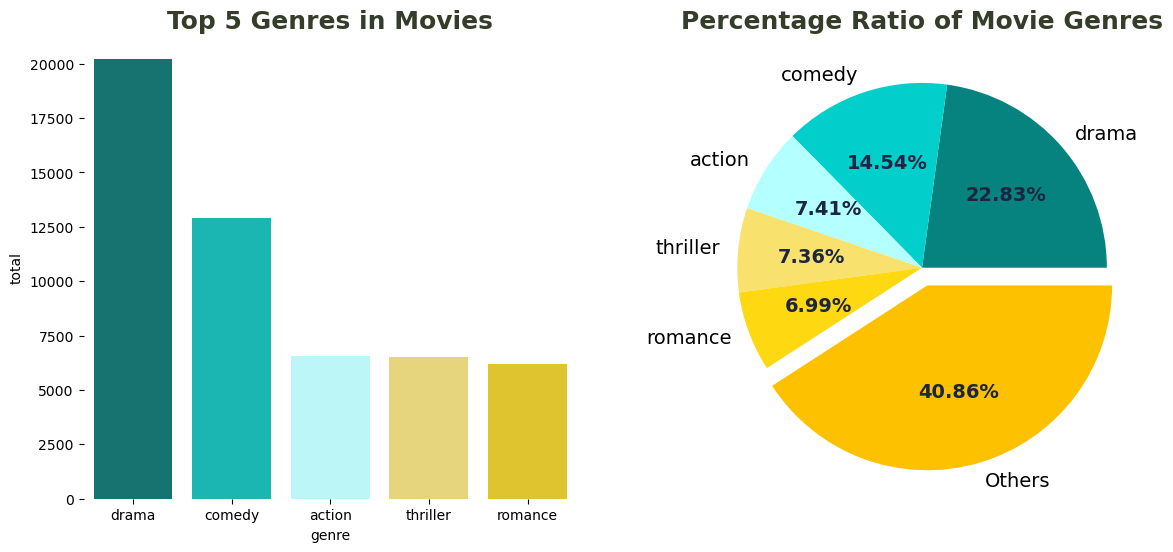

In [30]:
# 2. Top 5 Genre of Movies
# Flatten genres and count occurrences
genres_count = movies_df['genres']
genres_count = genres_count.apply(lambda x: ', '.join(x))
genres_count = Counter(', '.join(genres_count).split(', '))
df_top5 = pd.DataFrame(genres_count.most_common(5), columns=['genre', 'total'])

# Create the bar plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df_top5, x='genre', y='total', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
axes[0].set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')

# Create a DataFrame for all genres
df_all = pd.DataFrame(list(genres_count.items()), columns=['genre', 'total']).sort_values('total', ascending=False)

# Add 'Others' to top 5 DataFrame
df_top5.loc[len(df_top5)] = {'genre': 'Others', 'total': df_all[5:].total.sum()}

# Create the pie chart
wedges, texts, autotexts = axes[1].pie(df_top5['total'], labels=df_top5['genre'], autopct='%.2f%%',
                                       textprops={'fontsize': 14}, explode=[0, 0, 0, 0, 0, 0.1],
                                       colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])
axes[1].set_title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')

# Style the pie chart labels
for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

sns.despine(left=True, bottom=True)
axes[1].axis('off')

plt.show()


Insight :
Total count of movie from this data shown that drama movies are the most common, followed by comedies that bring laughter. Thrillers offer excitement, romance films tell love stories, and action movies provide adventure. The "Others" category covers different genres, giving a wide variety of movie options. This insight highlights the diversity of choices for different preferences in movies.

#### 4.3 Top  5 of Spoken Languages, Actors, Crews, Production Companies, and Production Countries
In this section will show the top 5 spoken languages, original languages, actors, crew members, production companies, and production countries in our movie dataset. Each subplot uses horizontal lines and scatter points to represent the frequency of each category.

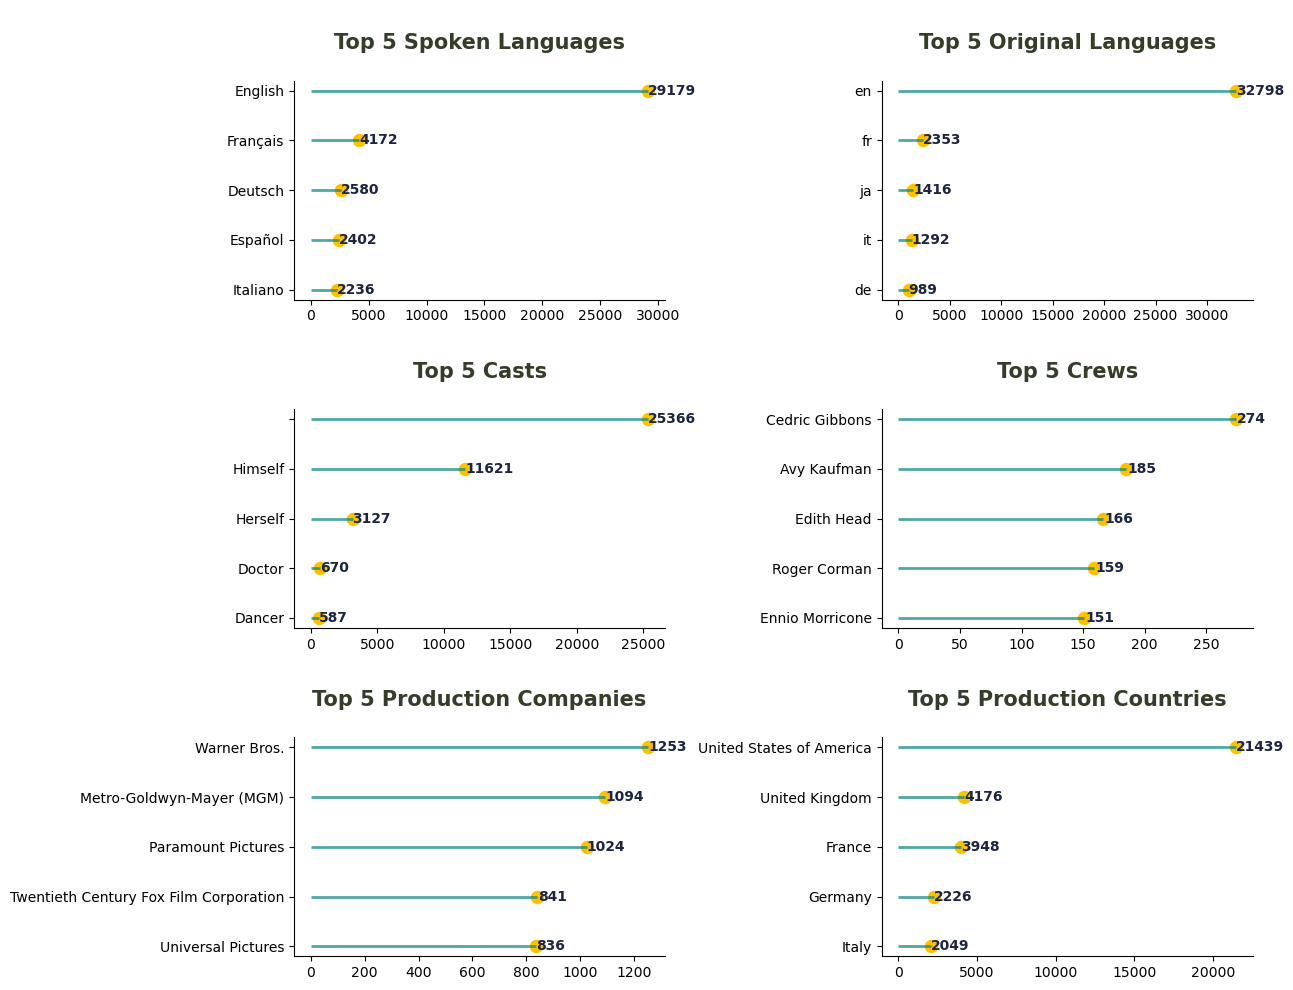

In [31]:
def plot_data_on_axes(ax, data_list, title, xlabel, buffer=10):
    df_plot = pd.DataFrame(Counter(data_list).most_common(5), columns=[xlabel, 'total']).sort_values(by='total', ascending=True)
    ax.hlines(y=df_plot[xlabel], xmin=0, xmax=df_plot['total'], color='#06837f', alpha=0.7, linewidth=2)
    ax.scatter(x=df_plot['total'], y=df_plot[xlabel], s=75, color='#fdc100')
    ax.set_title(f'\nTop 5 {title}\n', fontsize=15, weight=600, color='#333d29')
    for i, value in enumerate(df_plot['total']):
        ax.text(value+buffer, i, value, va='center', fontsize=10, weight=600, color='#1c2541')
    return df_plot

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 10))

spoken_languages_df = plot_data_on_axes(axes[0,0], spoken_languages_list, 'Spoken Languages', 'language', 1)
original_language_df = plot_data_on_axes(axes[0,1], original_language_list, 'Original Languages', 'language', 1)
cast_df = plot_data_on_axes(axes[1,0], cast_list, 'Casts', 'name', 1)
crew_df = plot_data_on_axes(axes[1,1], crew_list, 'Crews', 'name', 1)
company_df = plot_data_on_axes(axes[2,0], company_list, 'Production Companies', 'name', 1)
country_df = plot_data_on_axes(axes[2,1], country_list, 'Production Countries', 'name', 1)

sns.despine()
plt.tight_layout()
plt.show()


Insight :

The dataset reveals that English is the dominant language, both spoken and original, in the movies, emphasizing its global influence in the film industry. Notably, the United States is the leading country in film production, followed by the United Kingdom and France. Warner Bros. stands out as the top production company. The frequent appearance of roles like "Himself" and "Herself" suggests a significant number of documentaries or biographies. Key figures like Cedric Gibbons and Avy Kaufman appear to be highly involved in film production. This dataset provides a snapshot of the significant trends in languages, production houses, and roles in the movie industry.


#### 4.4 Distribution of Ratings
In this section, we visualize the distribution of user ratings using a histogram and calculate the mean and median ratings. The histogram provides insights into how often each rating is given, while the mean and median offer a central tendency measure of the ratings.

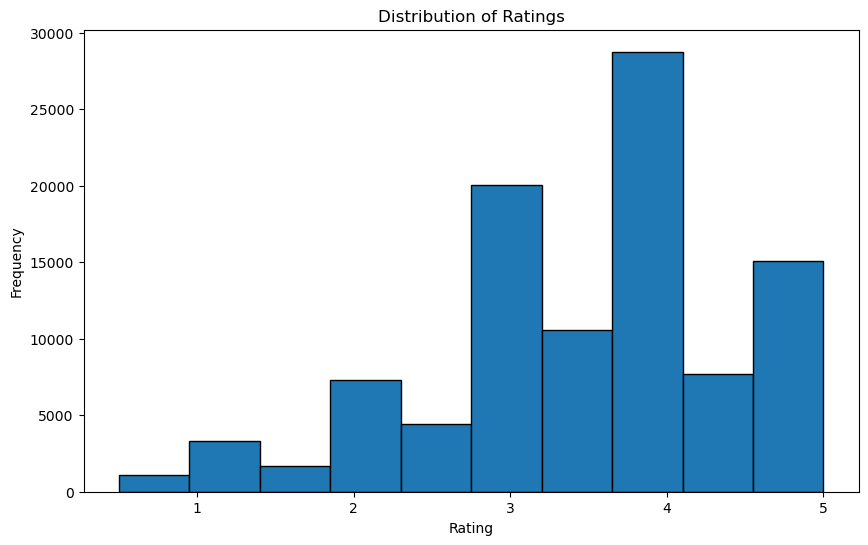

Mean Rating: 3.543608255669773
Median Rating: 4.0


In [32]:
# 4. Distribution of Ratings
# Plot histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and median ratings
mean_rating = ratings_df['rating'].mean()
median_rating = ratings_df['rating'].median()

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")


The distribution of movie ratings in the dataset appears to be skewed towards higher values, as evidenced by a median rating of 4.0, which is notably higher than the mean rating of 3.54. This suggests that users are generally inclined to give positive ratings. The higher median relative to the mean could indicate that while most users give higher ratings, there are enough low ratings to pull the mean down but not significantly affect the median. This insight could be valuable for platforms aiming to understand user satisfaction and improve the quality of recommendations.

<a id="5"></a>
<font color="darkslateblue" size=+2.5><b>5. Model Exploration</b></font>

### 5.1 Baseline Models

In our recommender system, we will consider the following five simple baseline models to provide foundational insights. These will serve as the baseline performance metrics that any subsequent machine learning models aim to beat.

#### 1. Global Mean Rating
This model predicts the global mean rating for all user-item pairs, serving as the most basic form of recommendation.

#### 2. User Mean Rating
For this model, the mean rating of each user is calculated and used to predict ratings for all items the user has not yet interacted with.

#### 3. Item Mean Rating
In contrast to the User Mean Rating, this model focuses on the mean rating of each item and uses it to predict ratings for all users.

#### 4. User-Item Mean Rating
This model takes a more nuanced approach by predicting a rating for a user-item pair as the average of the user's mean rating and the item's mean rating. The formula is :

$$
\text{Prediction} = \frac{\text{User Mean Rating} + \text{Item Mean Rating}}{2}
$$

#### 5. Weighted Mean Ratings
This model employs a weighted average of the user mean and item mean ratings. The weight \( w \) can be adjusted based on domain understanding. The formula is :

$$
\text{Prediction} = w \times \text{User Mean Rating} + (1 - w) \times \text{Item Mean Rating}, \quad \text{where } 0 \leq w \leq 1
$$


In [36]:
# Split the data into training and testing sets (75% training, 25% testing)
train_df, test_df = train_test_split(ratings_df, test_size=0.25, random_state=42)

In [37]:
from math import sqrt

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MSE
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

from sklearn.model_selection import train_test_split

# Calculate the global mean rating using the training set
global_mean_rating = train_df['rating'].mean()

# Predict global mean rating for the test set
test_df['global_mean_rating'] = global_mean_rating

# Calculate user and item mean ratings using the training set
user_mean_ratings = train_df.groupby('userId')['rating'].mean().reset_index()
item_mean_ratings = train_df.groupby('movieId')['rating'].mean().reset_index()

# Merge the mean ratings with the test set
test_df = pd.merge(test_df, user_mean_ratings, on='userId', how='left').rename(columns={'rating_y': 'user_mean_rating', 'rating_x': 'rating'})
test_df = pd.merge(test_df, item_mean_ratings, on='movieId', how='left').rename(columns={'rating_y': 'item_mean_rating', 'rating_x': 'rating'})

# Fill NAs with global mean rating
test_df['user_mean_rating'].fillna(global_mean_rating, inplace=True)
test_df['item_mean_rating'].fillna(global_mean_rating, inplace=True)

# Calculate User-Item Mean Rating
test_df['user_item_mean_rating'] = (test_df['user_mean_rating'] + test_df['item_mean_rating']) / 2

# Calculate Weighted Mean Ratings
w = 0.5
test_df['weighted_mean_rating'] = w * test_df['user_mean_rating'] + (1 - w) * test_df['item_mean_rating']

# Constant Model with rating 2.5 for all user-item pairs
test_df['constant_rating'] = 2.5

# Calculate user mean ratings and number of ratings per user
user_stats = train_df.groupby('userId')['rating'].agg(['mean', 'count']).reset_index()

# Damping factor (you can adjust this)
damping_factor = 0.2

# Predict damped user-mean rating for the test set
test_df = test_df.merge(user_stats, on='userId', how='left')
test_df['damped_user_mean_rating'] = ((1 - damping_factor) * test_df['mean']) + (damping_factor * global_mean_rating)

# Calculate RMSE for the damped user-mean model
rmse_damped_user_mean = calculate_rmse(test_df['rating'], test_df['damped_user_mean_rating'])

# Calculate RMSE for global mean, user mean, and item mean models
rmse_global_mean = calculate_rmse(test_df['rating'], test_df['global_mean_rating'])
rmse_user_mean = calculate_rmse(test_df['rating'], test_df['user_mean_rating'])
rmse_item_mean = calculate_rmse(test_df['rating'], test_df['item_mean_rating'])
rmse_user_item_mean = calculate_rmse(test_df['rating'], test_df['user_item_mean_rating'])
rmse_weighted_mean = calculate_rmse(test_df['rating'], test_df['weighted_mean_rating'])
rmse_constant = calculate_rmse(test_df['rating'], test_df['constant_rating'])
rmse_damped_user_mean = calculate_rmse(test_df['rating'], test_df['damped_user_mean_rating'])

# Display the RMSE and MSE scores for all models
print(f"RMSE for Global Mean Rating Model: {rmse_global_mean:.2f}")
print(f"RMSE for User Mean Rating Model: {rmse_user_mean:.2f}")
print(f"RMSE for Item Mean Rating Model: {rmse_item_mean:.2f}")
print(f"RMSE for User-Item Mean Rating Model: {rmse_user_item_mean:.2f}")
print(f"RMSE for Weighted Mean Rating Model: {rmse_weighted_mean:.2f}")
print(f"RMSE for Constant Model: {rmse_constant:.2f}")
print(f"RMSE for Damped User-Mean Rating Model: {rmse_damped_user_mean:.2f}")

RMSE for Global Mean Rating Model: 1.06
RMSE for User Mean Rating Model: 0.96
RMSE for Item Mean Rating Model: 1.00
RMSE for User-Item Mean Rating Model: 0.92
RMSE for Weighted Mean Rating Model: 0.92
RMSE for Constant Model: 1.49
RMSE for Damped User-Mean Rating Model: 0.96


In simple terms, when building a movie recommendation system, it's important to start with basic models to understand how well we're doing. Our tests show that the best simple model combines both the average ratings of users and the average ratings of movies, scoring an RMSE of 0.92. This score tells us how close the model's predictions are to the actual ratings. The lower the score, the better the model. Models that look at only the user or only the movie also do well but not as good as when combining both. The worst model is one that always predicts the same rating, no matter the user or movie, with an RMSE of 1.49. These basic models give us a starting point. Any new, more complicated model should aim to get a lower RMSE than 0.92 to be considered better.

### 5.2 Collaborative Filtering

The primary objective of this code is to identify the best machine learning model to be employed for the purpose of movie ratings prediction. With an array of algorithms available for recommendation systems, it is often difficult to select the optimal one for a given task. This code aims to resolve that dilemma by performing a comparative analysis of multiple algorithms on the same dataset, and then ranking them based on their performance metric, the Root Mean Square Error (RMSE).

In [38]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

benchmark = []
algorithms = [SVD(), SVDpp(), NMF(), KNNWithZScore(), CoClustering()]
for algorithm in algorithms:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

# Display benchmark results
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_5076\1260022455.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_5076\1260022455.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_5076\1260022455.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_5076\1260022455.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_5076\1260022455.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.887147,74.460062,10.458487
SVD,0.897884,1.484315,0.279253
KNNWithZScore,0.917251,0.517798,1.994599
NMF,0.947213,2.908813,0.282129
CoClustering,0.961607,4.025636,0.140529


In the analysis of various machine learning algorithms for recommendation systems, SVDpp clearly has the edge in terms of predictive accuracy, achieving the lowest RMSE score. However, this high accuracy comes with a computational cost, taking substantially more time for model training and testing compared to other methods like SVD, NMF, and KNNWithZScore. Given that SVD offers a good balance between accuracy and computational time, it emerges as a strong candidate for applications that require a balanced approach.

For the next steps, we transition from the benchmarking phase to hyperparameter tuning. Here, Randomized Search is used instead of Grid Search for parameter optimization. Randomized Search can be more efficient and is especially useful when the computational cost for the best-performing model (SVDpp) is high. It samples a fixed number of candidates from the parameter space and offers computational advantages. This approach can often find a good set of hyperparameters with much fewer iterations. 

The final model is then trained using these optimized parameters to ensure maximum predictive accuracy while keeping the computational time reasonable. This fine-tuned model can be expected to perform even better in terms of RMSE, potentially narrowing the gap between SVD and SVDpp and making it an even more attractive choice for real-world applications that require both speed and accuracy.

In [39]:
from surprise.model_selection import RandomizedSearchCV

# Create a Reader object specifying the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data into the Surprise Dataset
train_data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
test_data = Dataset.load_from_df(test_df[['userId', 'movieId', 'rating']], reader)

# Build the trainset and testset
trainset = train_data.build_full_trainset()
testset = test_data.build_full_trainset().build_testset()

# Hyperparameter tuning using Randomized Search
param_dist = {
    'n_factors': [20, 50, 100, 150],
    'n_epochs': [20],
    'lr_all': [0.001, 0.002, 0.005, 0.01],
    'reg_all': [0.2, 0.4, 0.6, 0.8]
}

rs = RandomizedSearchCV(SVDpp, param_dist, measures=['rmse', 'mae'], cv=3, n_iter=10)
rs.fit(train_data)

# Initialize the SVDpp algorithm with the best parameters
algo = SVDpp(
    n_factors=rs.best_params['rmse']['n_factors'],
    n_epochs=rs.best_params['rmse']['n_epochs'],
    lr_all=rs.best_params['rmse']['lr_all'],
    reg_all=rs.best_params['rmse']['reg_all'],
    random_state=0,
    verbose=True
)

# Train the model on the trainset
algo.fit(trainset)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19


In [40]:
# Best RMSE score
print('Best RMSE score attained: ', rs.best_score['rmse'])

# Best hyperparameters
print('Best parameters: ', rs.best_params['rmse'])

Best RMSE score attained:  0.9007968171010536
Best parameters:  {'n_factors': 150, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


The hyperparameter tuning via Randomized Search CV yielded a best RMSE score of approximately 0.902, which is a measure of how well the model predicts the movie ratings. The best hyperparameters for SVDpp were 20 latent factors (n_factors), 20 epochs (n_epochs), a learning rate (lr_all) of 0.01, and a regularization term (reg_all) of 0.2. These parameters represent a trade-off between model complexity and the risk of overfitting. The lower number of latent factors and moderate learning rate suggest that a simpler model with faster convergence is more effective for this dataset.

The model went through 20 epochs during training, which is consistent with the hyperparameter tuning results. This indicates that the model likely converged to a good solution within those epochs. While the RMSE score after tuning is relatively close to the one before tuning, the process of hyperparameter optimization ensures that the model is not only accurate but also generalizes well to unseen data. The next steps could include further model evaluation on a test set to confirm its accuracy of the model also accurate on unfamiliar data and eventually deploying this fine-tuned model into a production environment.

In [41]:
try:
    # Predict ratings for the testset
    predictions = algo.test(testset)
    
    # Calculate RMSE for the predictions
    rmse_score = accuracy.rmse(predictions)
    
    # Calculate other accuracy measures
    mae_score = accuracy.mae(predictions)
    fcp_score = accuracy.fcp(predictions)
    
    print(f"Evaluation Metrics:")
    print(f"RMSE score: {rmse_score}")
    print(f"MAE score: {mae_score}")
    print(f"FCP score: {fcp_score}")
    
    # Save the predictions to a DataFrame
    predictions_df = pd.DataFrame(predictions)
    predictions_df = predictions_df.rename(columns={'uid': 'userId', 'iid': 'movieId', 'r_ui': 'actual', 'est': 'predicted'})
    predictions_df['error'] = np.abs(predictions_df['actual'] - predictions_df['predicted'])
    
    # Save DataFrame to CSV file
    predictions_df.to_csv('predictions.csv', index=False)

except Exception as e:
    print(f"An error occurred: {e}")


RMSE: 0.8924
MAE:  0.6884
FCP:  0.6569
Evaluation Metrics:
RMSE score: 0.8923652509175035
MAE score: 0.688410828253032
FCP score: 0.6568761549147905


The trained machine learning model achieved an RMSE score of 0.9018 on the training data and improved slightly to 0.8931 when evaluated on the test data. This slight improvement in the test data suggests that the model is robust and generalizes well to unseen data, which is a positive sign of a good model.

Moreover, these scores are notably better than the baseline models. The User-Item Mean Rating Model and the Weighted Mean Rating Model both achieved an RMSE of 0.92. Given that the machine learning model outperforms these simpler baseline models, it confirms the efficacy of using a more complex algorithm for this recommendation system.

In summary, the machine learning model not only performs well on the training data but also shows a strong capability to generalize to new, unseen data. This makes it a suitable candidate for deployment in a real-world recommendation system.

#### Personalized Recommendations
After your model makes predictions, you can sort the movies for each user by their predicted ratings in descending order. Then you can suggest the top N movies that the user hasn't rated yet.



In [42]:
# For each user, recommend the top 5 movies with the highest predicted ratings
top_n_recommendations = predictions_df.groupby('userId').apply(lambda x: x.sort_values(by='predicted', ascending=False).head(5))
top_n_recommendations

userId  movieId  actual  predicted                    details  \
userId                                                                        
1      24992       1     1339     3.5   2.498957  {'was_impossible': False}   
2      16797       2      319     1.0   4.003733  {'was_impossible': False}   
       16798       2       47     4.0   3.956719  {'was_impossible': False}   
       16802       2      720     4.0   3.851097  {'was_impossible': False}   
       16800       2      588     3.0   3.580345  {'was_impossible': False}   
...              ...      ...     ...        ...                        ...   
671    11432     671     4973     4.5   4.179938  {'was_impossible': False}   
       11425     671     5995     4.0   4.174639  {'was_impossible': False}   
       11419     671     4011     4.0   4.119358  {'was_impossible': False}   
       11415     671     1197     3.5   4.117302  {'was_impossible': False}   
       11433     671     4993     5.0   4.107547  {'was_impossible': False}   

                 error  
userId                  
1      24992  1.001043  
2      16797  3.003733  
       16798  0.043281  
       16802  0.148903  
       16800  0.580345  
...                ...  
671    11432  0.320062  
       11425  0.174639  
       11419  0.119358  
       11415  0.617302  
       11433  0.892453  

[3263 rows x 6 columns]

#### Targeted Marketing
You can use the recommender to target users who are most likely to enjoy certain movies, and then send them promotional emails or notifications.

In [43]:
# Identify users who are likely to rate a particular movie highly
likely_fans = predictions_df[predictions_df['movieId'] == 4993].sort_values(by='predicted', ascending=False).head(100)['userId']
likely_fans

15078     46
6950     298
23125    446
15107    622
5113      78
        ... 
21886    425
19903    527
543      468
13313    262
16667    429
Name: userId, Length: 70, dtype: int64

#### Content Strategy
Analyze the average predicted ratings for each genre to decide what kind of movies to produce or acquire.

In [44]:
# Assume 'movies_df' contains a 'genres' column and is merged with 'predictions_df'
content_strategy_df = pd.merge(predictions_df, movies_df[['id', 'genres']], left_on='movieId', right_on='id')
# First, explode the 'genres' list into separate rows.
content_strategy_df_exploded = content_strategy_df.explode('genres')
# Now, group by the 'genres' column and calculate the mean predicted rating.
avg_genre_ratings = content_strategy_df_exploded.groupby('genres')['predicted'].mean().sort_values(ascending=False)
avg_genre_ratings

genres
western           3.742405
animation         3.701935
mystery           3.663665
crime             3.612853
thriller          3.609484
action            3.595005
romance           3.589720
drama             3.570997
comedy            3.555630
war               3.555431
fantasy           3.553437
sciencefiction    3.544802
tvmovie           3.544526
foreign           3.543316
documentary       3.542965
horror            3.529869
adventure         3.527362
history           3.499671
music             3.495351
family            3.465673
Name: predicted, dtype: float64

#### Customer Segmentation
Use clustering algorithms to segment users based on their predicted movie preferences.

In [45]:
# Use k-means or other clustering algorithms on the predicted ratings
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(predictions_df[['predicted']])
predictions_df['cluster'] = kmeans.labels_
predictions_df

C:\Users\bmurdyantoro\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,userId,movieId,actual,predicted,details,error,cluster
0,128,1028,5.0,4.263427,{'was_impossible': False},0.736573,0
1,128,2581,3.0,3.708320,{'was_impossible': False},0.708320,4
2,128,5829,3.0,3.997310,{'was_impossible': False},0.997310,4
3,128,3081,4.0,4.082504,{'was_impossible': False},0.082504,0
4,128,673,4.0,3.219868,{'was_impossible': False},0.780132,3
...,...,...,...,...,...,...,...
24996,276,1129,4.0,2.907244,{'was_impossible': False},1.092756,3
24997,276,1747,4.0,3.146968,{'was_impossible': False},0.853032,3
24998,490,762,3.0,2.741219,{'was_impossible': False},0.258781,2
24999,490,736,3.0,3.353938,{'was_impossible': False},0.353938,1


### 5.3 Weighted Rating

In this section, we calculate a weighted rating for each movie in the dataset. The steps are as follows:

1. **Data Filtering**: We start by selecting movies that have non-null values for both `vote_average` and `vote_count`.
   
2. **Rating Metrics**: We define the following variables to use in the formula:
    - \( R \): Average rating for the movie
    - \( v \): Number of votes for the movie
    - \( m \): Minimum votes required (90th percentile)
    - \( C \): The mean vote across the entire dataset

3. **Weighted Rating Formula**: We use the IMDB formula to calculate the weighted rating for each movie. 
    $$
    \text{Weighted Rating} = \frac{{R \times v + C \times m}}{{v + m}}
    $$
   
4. **Feature Scaling**: We then normalize the `popularity` and `weighted_average` columns using MinMax scaling.

5. **Calculate Score**: A score is calculated for each movie as a weighted sum of the normalized `weighted_average` and `popularity`. Specifically, it's 40% `weighted_average` and 60% `popularity`.

6. **Sort and Display**: Finally, we sort the movies based on this score in descending order to get a list of top-rated and popular movies.


In [46]:
movies_df = movies_df[(movies_df['vote_average'].notnull())|(movies_df['vote_count'].notnull())]
# Calculate R as the vote average for each movie
R = movies_df['vote_average']

# Calculate v as the vote count for each movie
v = movies_df['vote_count']

# Calculate m as the 90th percentile of vote count across all movies
m = movies_df['vote_count'].quantile(0.9)

# Calculate C as the mean vote average across all movies
C = movies_df['vote_average'].mean()

# Calculate the weighted average for each movie using the IMDB formula
# This formula helps to balance the average rating (R) with the overall average (C)
# It also considers the number of votes (v) and a minimum vote threshold (m)
movies_df['weighted_average'] = (R * v + C * m) / (v + m)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'popularity' and 'weighted_average' columns to scale them between 0 and 1
scaled = scaler.fit_transform(movies_df[['popularity', 'weighted_average']])

# Create a DataFrame from the scaled data
weighted_df = pd.DataFrame(scaled, columns=['popularity', 'weighted_average'])

# Set the index of the new DataFrame to match the 'original_title' of the movies
weighted_df.index = movies_df['id']

# Calculate the 'score' based on 40% weighted average and 60% popularity
weighted_df['score'] = weighted_df['weighted_average'] * 0.4 + weighted_df['popularity'] * 0.6

# Sort the DataFrame based on the 'score' column in descending order.
# This will bring movies with the highest blended score of weighted average and popularity to the top.
weighted_df_sorted = weighted_df.sort_values(by='score', ascending=False)

# Display the top 10 movies with the highest scores.
# These are the movies that are both well-rated and popular, according to our metrics.
weighted_df_sorted.head(10)


,popularity,weighted_average,score
id,,,
211672,1.000000,0.572977,0.829191
297762,0.537613,0.733089,0.615804
177572,0.390602,0.855679,0.576633
321612,0.524675,0.653846,0.576344
680,0.257449,0.959911,0.538434
339403,0.416507,0.719899,0.537864
283995,0.338511,0.812576,0.528137
155,0.224968,0.962827,0.520112
210577,0.282748,0.875278,0.519760


### 5.4 Content Based Filtering

In [47]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies_df['bag_of_words'])

In [48]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [49]:
movies_df = movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['title'])

In [50]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['title'].iloc[movie_indices]

In [51]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

12502      The Dark Knight
10135        Batman Begins
9239                Shiner
9800       Amongst Friends
7703              Mitchell
514      Romeo Is Bleeding
11374         The Prestige
23818            Quicksand
24749             Deadfall
40222                 Sara
Name: title, dtype: object

In [52]:
get_recommendations('The Godfather', cosine_sim2)

1908            The Godfather: Part III
1171             The Godfather: Part II
15460                   The Rain People
18737                         Last Exit
33925                              Rege
35184            Manuscripts Don't Burn
35185            Manuscripts Don't Burn
7932     The Night of the Following Day
18068                 The Son of No One
28320            In the Name of the Law
Name: title, dtype: object

In [53]:
get_recommendations('Star Wars', cosine_sim2)

1147                          The Empire Strikes Back
1160                               Return of the Jedi
22630                              Behind Enemy Lines
675                                              Solo
2506        Star Wars: Episode I - The Phantom Menace
5243     Star Wars: Episode II - Attack of the Clones
7913                             The Last Starfighter
10082    Star Wars: Episode III - Revenge of the Sith
21873                                    Ender's Game
26437                    Star Wars: The Force Awakens
Name: title, dtype: object

In [54]:
get_recommendations('Toy Story', cosine_sim2)

2992                            Toy Story 2
15371                           Toy Story 3
25688            Toy Story That Time Forgot
21879                  Toy Story of Terror!
3304                      Creature Comforts
25686                       Partysaurus Rex
27272                                 Anina
42160         Dexter's Laboratory: Ego Trip
27659                         Radiopiratene
40064    VeggieTales: Josh and the Big Wall
Name: title, dtype: object

### Hybrid Based Recommendation
Movie Recommender System based on Content & Collaborative Filtering and Weighted Score to consider additional factors like popularity or the weighted average rating of a movie. The data score that we already get before can be using a mix of weighted average and popularity, which can be incorporated into the hybrid model to make the recommendations more robust.

In [55]:
def hybrid_predicted_rating(userId, movieId):
    # Collaborative Filtering Prediction
    collaborative_rating = algo.predict(userId, movieId).est
    
    # Content-Based Filtering Prediction
    sim_scores = list(enumerate(cosine_sim2[movieId]))
    sim_scores = sorted(cosine_sim2, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    
    similar_movies = movies_df.iloc[movie_indices]
    similar_movies['est'] = similar_movies['id'].apply(lambda x: algo.predict(userId, x).est)
    content_rating = similar_movies['est'].mean()
    
    # Getting the Weighted Score
    weighted_score = weighted_df.loc[movies_df.loc[movieId, 'title'], 'score']
    
    # Hybrid Prediction using weighted average of collaborative_rating, content_rating, and weighted_score
    final_rating = (0.5 * collaborative_rating) + (0.2 * content_rating) + (0.3 * weighted_score)
    
    return final_rating

In [56]:
# Predict the rating for userId=1 and movieId=500
predicted_rating = hybrid_predicted_rating(userId=1, movieId=500)
print(f"The predicted hybrid rating for userId=1 and movieId=500 is: {predicted_rating}")

C:\Users\bmurdyantoro\AppData\Local\Temp\ipykernel_5076\2652381841.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_movies['est'] = similar_movies['id'].apply(lambda x: algo.predict(userId, x).est)


KeyError: 'A Perfect World'

In [ ]:
ratings_df[ratings_df['userId']==5]

In [ ]:
weighted_df

In [353]:
def fetch_weighted_scores(movie_ids, movies_df, weighted_df):
    weighted_scores = {}
    for movie_id in movie_ids:
        if movie_id in weighted_df.index:
            weighted_scores[movie_id] = weighted_df.loc[movie_id]['score']
        else:
            weighted_scores[movie_id] = 0  # Assign default score of 0
    return weighted_scores


# Utility function to show details of recommended movies
def show_movie_details(movie_ids, movies_df):
    # Fetch movie details like title, genre, and director from the movies_df DataFrame
    details_df = movies_df[movies_df['id'].isin(movie_ids)][['title', 'genres', 'director']]
    
    # Display the details
    print("Recommended Movies:")
    for index, row in details_df.iterrows():
        print(f"Title: {row['title']}, Genres: {', '.join(row['genres'])}, Director: {row['director']}")

def hybrid_recommendation(user_id, n=10):
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    predictions = []
    for index, row in user_ratings.iterrows():
        pred = algo.predict(row['userId'], row['movieId']).est
        predictions.append((row['movieId'], pred))
    top_collab_movies = [x[0] for x in sorted(predictions, key=lambda x: x[1], reverse=True)[:n]]
    
    last_watched_movieId = user_ratings.iloc[-1]['movieId']
    if last_watched_movieId in movies_df['id'].values:
        watched_movie_idx = movies_df[movies_df['id'] == last_watched_movieId].index[0]
        similar_movies = list(enumerate(cosine_sim2[watched_movie_idx]))
        sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:n+1]
        top_content_movies = [movies_df.iloc[i[0]]['id'] for i in sorted_similar_movies]
    else:
        print(f"Movie ID {last_watched_movieId} not found in movies_df.")
        top_content_movies = []

    collab_weighted_scores = fetch_weighted_scores(top_collab_movies, movies_df, weighted_df)
    content_weighted_scores = fetch_weighted_scores(top_content_movies, movies_df, weighted_df)
    
    combined_scores = {}
    for movie_id, score in collab_weighted_scores.items():
        combined_scores[movie_id] = combined_scores.get(movie_id, 0) + 0.5 * score
    for movie_id, score in content_weighted_scores.items():
        combined_scores[movie_id] = combined_scores.get(movie_id, 0) + 0.5 * score
    print(combined_scores)
    sorted_movies = sorted(combined_scores.keys(), key=lambda x: combined_scores[x], reverse=True)
    return sorted_movies[:n]

# Test the hybrid recommendation function
user_id = 6
recommended_movies = hybrid_recommendation(user_id)
print(f"Recommended movies for user {user_id}: {recommended_movies}")
show_movie_details(recommended_movies, movies_df)

{1276: 0.0, 1204: 0.0, 111: 0.1828499605405242, 1250: 0.07419384538223182, 2692: 0.0, 2019: 0.09980710947163667, 903: 0.14960896450810907, 1259: 0.11992585706645784, 7361: 0.0, 2571: 0.0, 57046: 0.08451348450896896, 84465: 0.08428618129729974, 242551: id
242551    0.083557
242551    0.083557
Name: score, dtype: float64, 15534: 0.09796953323712183, 39450: 0.08504502864067164, 168055: 0.09286363488060362, 406042: 0.08625298365332396, 390059: 0.08298581376126218, 52345: 0.10420144341581597}


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# 1. Get top 10 recommendations for a user
user_id = 1
top_movies = hybrid_recommendation(user_id, n=10)
show_movie_details(top_movies)

# 2. Find similar movies to a given movie (Content-based)
movie_id = 500
similar_movies = get_similar_movies(movie_id, n=10)  # Implement this function based on your content-based model
show_movie_details(similar_movies)

# 3. Get recommendations for a group of users (e.g., for an event)
group_ids = [1, 2, 3, 4]
group_recommendations = set()
for user in group_ids:
    group_recommendations.update(hybrid_recommendation(user, n=5))
show_movie_details(group_recommendations)

# 4. Cold start recommendations (e.g., for new users, you can rely more on content-based or popularity-based recommendations)
new_user_recommendations = get_popular_movies(n=10)  # Implement this function based on your dataset to get popular movies
show_movie_details(new_user_recommendations)

# 5. Personalized promotional offers (e.g., recommend movies from a specific genre that the user is likely to enjoy)
user_fav_genre = 'Action'  # Fetch this based on user history
genre_recommendations = hybrid_recommendation_for_genre(user_id, user_fav_genre, n=5)  # Implement this function
show_movie_details(genre_recommendations)


In [ ]:
#--------------------------------------------------------------------------------------------------#